## <b><span style='color:#F1C40F'>|</span> Завантаження [набору даних](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)</b>

In [1]:
import pandas as pd

dataset = pd.read_csv("spam.csv",encoding='latin-1')
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## <b><span style='color:#F1C40F'>|</span> Вивід інформації про датасет</b>

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          5572 non-null   object
 1   text            5572 non-null   object
 2   num_sentence    5572 non-null   int64 
 3   num_characters  5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


## <b><span style='color:#F1C40F'>|</span> Підрахунок та відсоток відсутніх значень у кожному стовпці</b>

In [2]:
sum_isnull_values = dataset.isnull().sum()
percentage_isnull_values = (dataset.isnull().sum() / dataset.isnull().count())
values = pd.DataFrame([sum_isnull_values, percentage_isnull_values])
values

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0.0,0.0,5522.000000,5560.000000,5566.000000
1,0.0,0.0,0.991027,0.997846,0.998923


## <b><span style='color:#F1C40F'>|</span> Видалення непотрібних стовпців і задання нових назв стовпців</b>

In [3]:
dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace = True)
dataset.columns = ['target', 'text']
dataset

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## <b><span style='color:#F1C40F'>|</span> Візуалізація розподілу цільової змінної (spam/ham) у вигляді кругової діаграми</b>

<Axes: ylabel='count'>

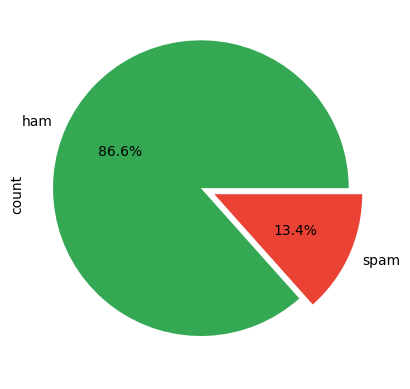

In [4]:
dataset["target"].value_counts().plot(kind = 'pie', colors = ['#34a853','#ea4335'], explode = (0.1,0), autopct = '%1.1f%%')

## <b><span style='color:#F1C40F'>|</span> Описова статистика для кожної категорії цільової змінної</b>

In [5]:
description = dataset.groupby("target").describe() 
print(description.to_string())

        text                                                                                                                                                                   
       count unique                                                                                                                                                    top freq
target                                                                                                                                                                         
ham     4825   4516                                                                                                                                 Sorry, I'll call later   30
spam     747    653  Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!    4


## <b><span style='color:#F1C40F'>|</span> Додавання нового стовпця з кількістю символів у тексті</b>

In [11]:
dataset['num_characters'] = dataset['text'].apply(len)
dataset

,target,text,num_sentence,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",2,111
1,ham,Ok lar... Joking wif u oni...,2,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,2,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,4,161
5568,ham,Will Ì_ b going to esplanade fr home?,1,37
5569,ham,"Pity, * was in mood for that. So...any other s...",2,57
5570,ham,The guy did some bitching but I acted like i'd...,1,125


## <b><span style='color:#F1C40F'>|</span> Візуалізація розподілу кількості символів у спам-повідомленнях та простих повідомленнях</b>

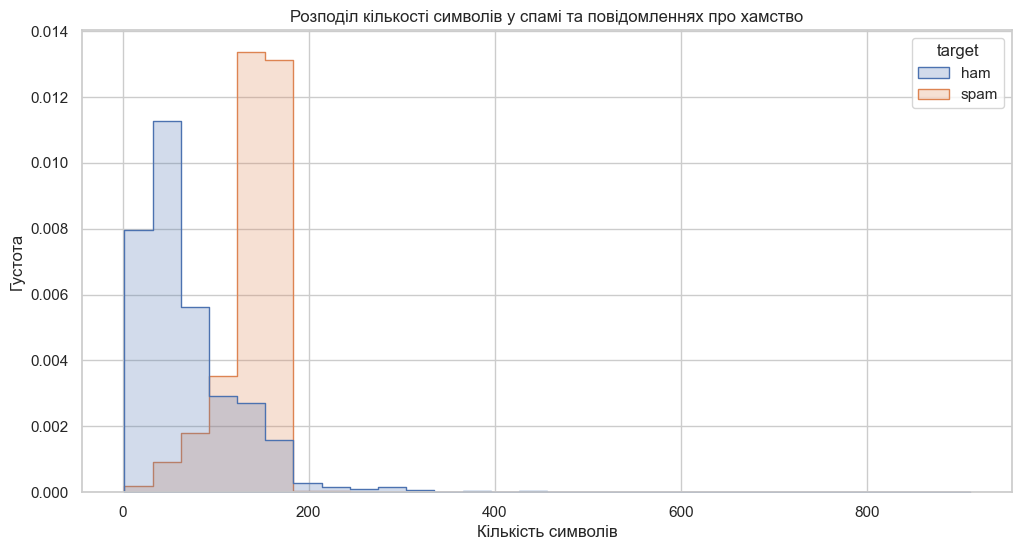

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(dataset, x='num_characters', hue='target', element='step', stat='density', common_norm=False, bins=30)
plt.title('Розподіл кількості символів у спамі та повідомленнях про хамство')
plt.xlabel('Кількість символів')
plt.ylabel('Густота')
plt.show()